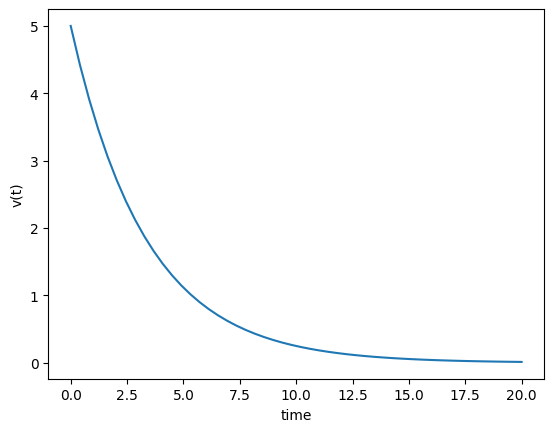

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

y0 = 5

t = np.linspace(0,20)

y = odeint(model, y0, t)

plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('v(t)')
plt.show()

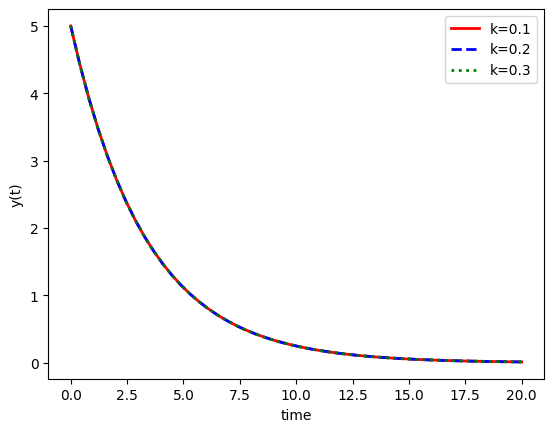

In [2]:

def model(y,t,k):
    k = 0.3
    dydt = -k * y
    return dydt

y0 = 5

t = np.linspace(0,20)


k = 0.1
y1 = odeint(model,y0,t,args=(k,))
k = 0.2
y2 = odeint(model,y0,t,args=(k,))
k = 0.5
y3 = odeint(model,y0,t,args=(k,))


plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=2,label='k=0.3')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()


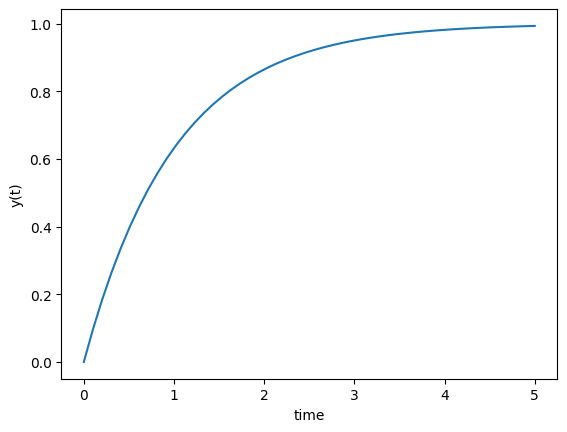

In [3]:
def f(y,t):
    dy_dt = -y + 1
    return dy_dt

y0 = 0

t = np.linspace(0,5)

y = odeint(f,y0,t)


plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

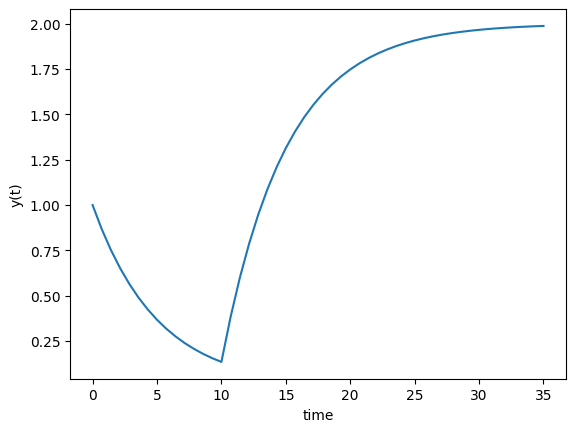

In [4]:

def f1(y,t):
    if (t<10):
        u = 0
    else:
        u = 2
    dydt = (-y + u)/5
    return dydt

y0 = 1

t = np.linspace(0,35)

y = odeint(f1,y0,t)

plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

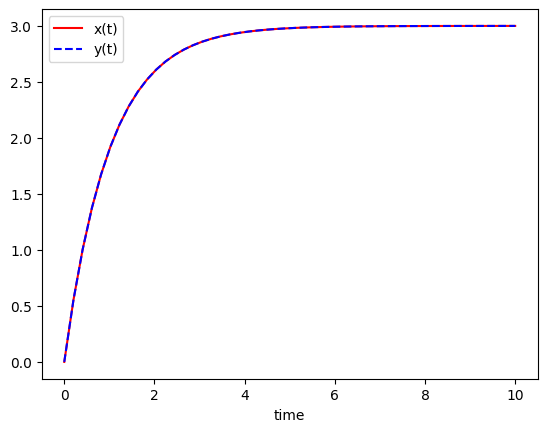

In [5]:
def f2(z,t):
    x = z[0]
    y = z[1]
    dx2dt = 3 * np.exp(-t)
    dy2dt = 3 - y
    return [dx2dt,dy2dt]


z0 = [0,0]

t = np.linspace(0,10)

z = odeint(f2,z0,t)

x = z[:,0]
y = z[:,1]

plt.plot(t,x,'r-')
plt.plot(t,y,'b--')
plt.xlabel('time')
plt.legend(['x(t)','y(t)'])
plt.show()


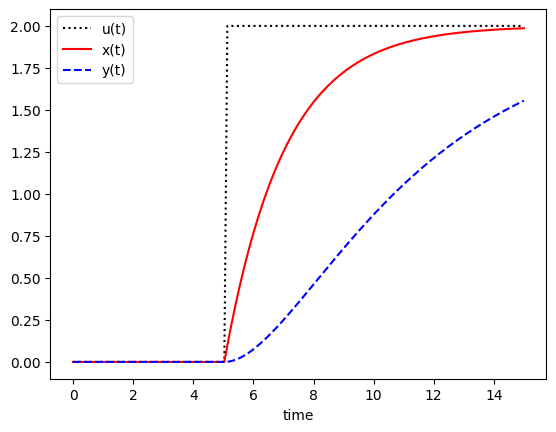

In [6]:


def f3(z,t,u):
    x = z[0]
    y = z[1]
    dx3dt = (u - x)/2
    dy3dt = (x - y)/5
    return [dx3dt,dy3dt]

z0 = [0,0]

n = 150
t = np.linspace(0,15,n)
u = np.zeros(n)
u[51:] = 2


x = np.zeros(n)
y = np.zeros(n)

for i in range (1,n):
    t_span = [t[i-1],t[i]]
    z = odeint(f3,z0,t,args=(u[i],))
    z0 = z[1]
    x[i] = z0[0]
    y[i] = z0[1]


plt.plot(t,u,'k:')
plt.plot(t,x,'r-')
plt.plot(t,y,'b--')
plt.xlabel('time')
plt.legend(['u(t)','x(t)','y(t)'])
plt.show()

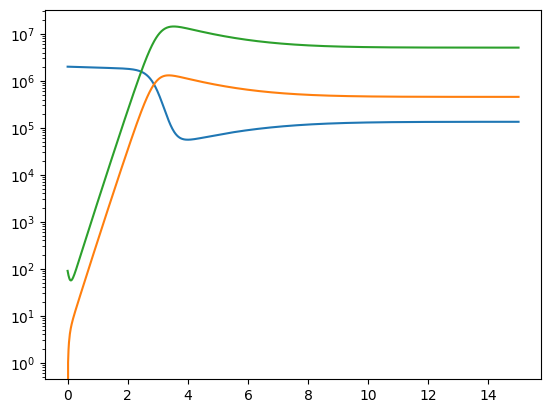

In [7]:
def odes(x, t):
    # constants
    a1 = 3e5
    a2 = 0.2
    a3 = 4e-7
    a4 = 0.6
    a5 = 8
    a6 = 90

    # assign each ODE to a vector element
    A = x[0]
    B = x[1]
    C = x[2]

    # define each ODE
    dAdt = a1 - a2*A - a3*A*C
    dBdt = a3*A*C - a4*B
    dCdt = -a3*A*C - a5*C + a6*B

    return [dAdt, dBdt, dCdt]

# initial conditions
x0 = [2e6, 0, 90]

# test the defined odes
# print(odes(x=x0,t=0))

# declare a time vector (time window)
t = np.linspace(0,15,1000)
x = odeint(odes,x0,t)

A = x[:,0]
B = x[:,1]
C = x[:,2]

# plot the results
plt.semilogy(t,A)
plt.semilogy(t,B)
plt.semilogy(t,C)
plt.show()